In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/breaking-captchas/breaking-captchas.zip
!unzip -qq breaking-captchas.zip
%cd breaking-captchas

--2023-03-08 02:33:24--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/breaking-captchas/breaking-captchas.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.145.26, 52.92.132.106, 3.5.77.162, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.145.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6599054 (6.3M) [binary/octet-stream]
Saving to: ‘breaking-captchas.zip’

breaking-captchas.z 100%[===================>]   6.29M  8.49MB/s    in 0.7s    

2023-03-08 02:33:25 (8.49 MB/s) - ‘breaking-captchas.zip’ saved [6599054/6599054]

/content/breaking-captchas


In [2]:
from pyimagesearch.utils.captchahelper import preprocess
from pyimagesearch.nn.conv import LeNet
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from imutils import contours
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import argparse
import cv2
import os

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
args = {
	"dataset": "dataset",
	"model": "output/lenet.hdf5",
}

In [5]:
data = []
labels = []

In [6]:
img = cv2.imread("dataset/1/000001.png")

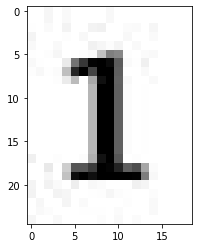

In [8]:
plt.imshow(img)

In [10]:
img.shape

(25, 19, 3)

In [11]:
(h, w) = img.shape[:2]

In [12]:
img1 = imutils.resize(img, width=28)
img1.shape 

(36, 28, 3)

In [15]:
img = imutils.resize(img, height=28)
img.shape 

(28, 21, 3)

In [16]:
padW = int((28 - img.shape[1]) / 2.0)
padH = int((28 - img.shape[0]) / 2.0)

image = cv2.copyMakeBorder(img, padH, padH, padW, padW, 
                           cv2.BORDER_REPLICATE)
img = cv2.resize(img, (28, 28))

img.shape 

(28, 28, 3)

In [18]:
for imagePath in paths.list_images("dataset"):
  label = imagePath.split(os.path.sep)
  print(label)

['dataset', '2', '000017.png']
['dataset', '2', '000075.png']
['dataset', '2', '000222.png']
['dataset', '2', '000077.png']
['dataset', '2', '000024.png']
['dataset', '2', '000005.png']
['dataset', '2', '000078.png']
['dataset', '2', '000090.png']
['dataset', '2', '000113.png']
['dataset', '2', '000195.png']
['dataset', '2', '000172.png']
['dataset', '2', '000189.png']
['dataset', '2', '000038.png']
['dataset', '2', '000056.png']
['dataset', '2', '000212.png']
['dataset', '2', '000224.png']
['dataset', '2', '000185.png']
['dataset', '2', '000009.png']
['dataset', '2', '000204.png']
['dataset', '2', '000168.png']
['dataset', '2', '000192.png']
['dataset', '2', '000013.png']
['dataset', '2', '000006.png']
['dataset', '2', '000036.png']
['dataset', '2', '000209.png']
['dataset', '2', '000139.png']
['dataset', '2', '000028.png']
['dataset', '2', '000093.png']
['dataset', '2', '000110.png']
['dataset', '2', '000004.png']
['dataset', '2', '000193.png']
['dataset', '2', '000187.png']
['datase

In [6]:
for imagePath in paths.list_images(args["dataset"]):
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	image = preprocess(image, 28, 28)
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [10]:
lb = LabelBinarizer().fit(trainY)
trainY = lb.transform(trainY)
testY = lb.transform(testY)

In [11]:
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=9)
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [12]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY,  validation_data=(testX, testY),
	batch_size=32, epochs=15, verbose=1)

[INFO] training network...
Epoch 1/15
48/48 [==============================] - 7s 101ms/step - loss: 2.1685 - accuracy: 0.2558 - val_loss: 2.1447 - val_accuracy: 0.3241
Epoch 2/15
48/48 [==============================] - 5s 109ms/step - loss: 2.1214 - accuracy: 0.3486 - val_loss: 2.0966 - val_accuracy: 0.4811
Epoch 3/15
48/48 [==============================] - 4s 74ms/step - loss: 2.0519 - accuracy: 0.5003 - val_loss: 2.0024 - val_accuracy: 0.4771
Epoch 4/15
48/48 [==============================] - 4s 74ms/step - loss: 1.9054 - accuracy: 0.6289 - val_loss: 1.8181 - val_accuracy: 0.6501
Epoch 5/15
48/48 [==============================] - 4s 92ms/step - loss: 1.5762 - accuracy: 0.8131 - val_loss: 1.5216 - val_accuracy: 0.5288
Epoch 6/15
48/48 [==============================] - 4s 81ms/step - loss: 0.9503 - accuracy: 0.9331 - val_loss: 0.7344 - val_accuracy: 0.8131
Epoch 7/15
48/48 [==============================] - 4s 73ms/step - loss: 0.3705 - accuracy: 0.9914 - val_loss: 0.3597 - val_a

In [13]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
16/16 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        50
           4       1.00      0.98      0.99        61
           5       0.99      0.99      0.99        75
           6       0.98      1.00      0.99        57
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        54
           9       1.00      1.00      1.00        39

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



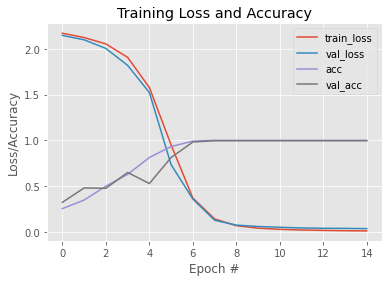

In [14]:
# plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 15), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [15]:
args = {
	"input": "downloads",
	"model": "output/lenet.hdf5",
}

In [18]:
model = load_model(args["model"])

In [21]:
imagePaths = list(paths.list_images(args["input"]))
imagePaths = np.random.choice(imagePaths, size=(10,),
	replace=False)

In [19]:
imagePaths = ['/content/004F31CE-370C-4E69-AC88-CE1D54EA6853_1.jpg', 
 '/content/0085121D-F9D0-4CF6-AE82-58A186AAA6C5_1.jpg',
 '/content/00CE38A1-B3B7-4AF7-9182-3556EBE3ACEC_2.jpg',
 '/content/010ACE33-3181-4DDD-AEC3-2590A9A27E16_1.jpg',
 '/content/010FF11B-E70C-497E-ABCF-E255DF248938_1.jpg',
 '/content/0129715A-D598-4950-8BCD-E63F9731679F_2.jpg']

1/1 [==============================] - 0s 32ms/step
[INFO] captcha: 2571


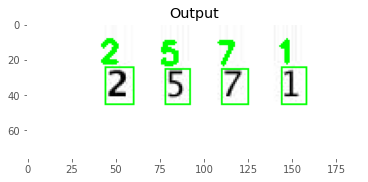

1/1 [==============================] - 0s 26ms/step
[INFO] captcha: 5659


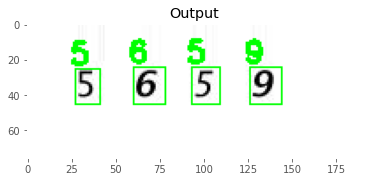

1/1 [==============================] - 0s 33ms/step
[INFO] captcha: 4784


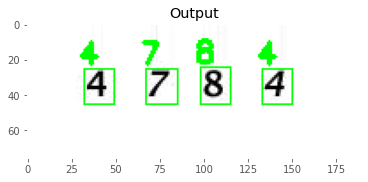

1/1 [==============================] - 0s 35ms/step
[INFO] captcha: 4418


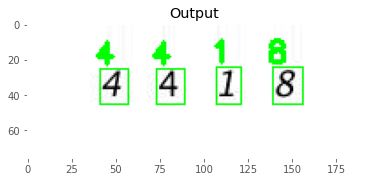

1/1 [==============================] - 0s 48ms/step
[INFO] captcha: 8883


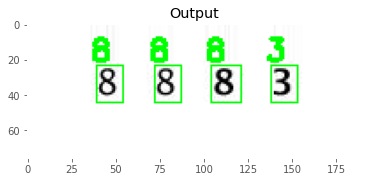

1/1 [==============================] - 0s 23ms/step
[INFO] captcha: 5995


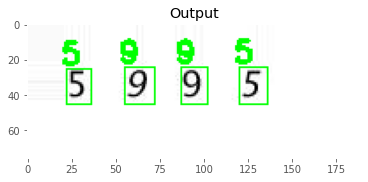

1/1 [==============================] - 0s 38ms/step
[INFO] captcha: 7361


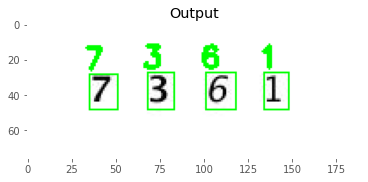

1/1 [==============================] - 0s 32ms/step
[INFO] captcha: 6737


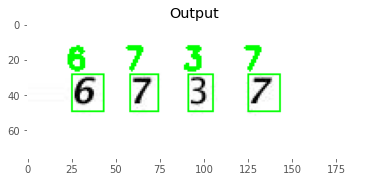

1/1 [==============================] - 0s 106ms/step
[INFO] captcha: 8236


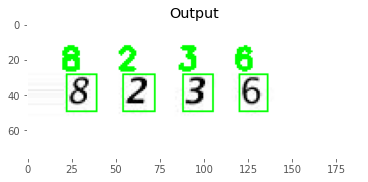

1/1 [==============================] - 0s 45ms/step
[INFO] captcha: 2389


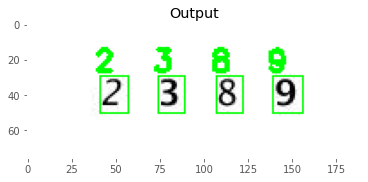

In [27]:
for imagePath in imagePaths:

	# load the image and convert it to grayscale, then pad the image
	# to ensure digits caught only the border of the image are
	# retained
	image = cv2.imread(imagePath)
 
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	gray = cv2.copyMakeBorder(gray, 20, 20, 20, 20,
		cv2.BORDER_REPLICATE)

	# threshold the image to reveal the digits
	thresh = cv2.threshold(gray, 0, 255,
		cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

	# find contours in the image, keeping only the four largest ones,
	# then sort them from left-to-right
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:4]
	cnts = contours.sort_contours(cnts)[0]

	# initialize the output image as a "grayscale" image with 3
	# channels along with the output predictions
	output = cv2.merge([gray] * 3)
	predictions = []

	# loop over the contours
	for c in cnts:
		# compute the bounding box for the contour then extract the
		# digit
		(x, y, w, h) = cv2.boundingRect(c)
		roi = gray[y - 5:y + h + 5, x - 5:x + w + 5]

		# pre-process the ROI and classify it then classify it
		roi = preprocess(roi, 28, 28)
		roi = np.expand_dims(img_to_array(roi), axis=0) / 255.0
		pred = model.predict(roi).argmax(axis=1)[0] + 1
		predictions.append(str(pred))

		# draw the prediction on the output image
		cv2.rectangle(output, (x - 2, y - 2),
			(x + w + 4, y + h + 4), (0, 255, 0), 1)
		cv2.putText(output, str(pred), (x - 5, y - 5),
			cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)

	# show the output image
	print("[INFO] captcha: {}".format("".join(predictions)))
	plt_imshow("Output", output)

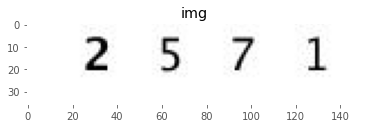

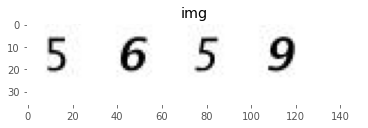

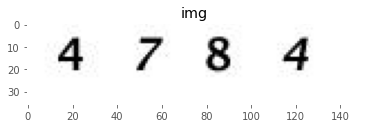

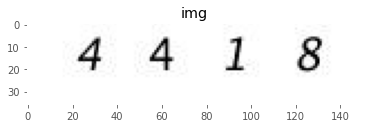

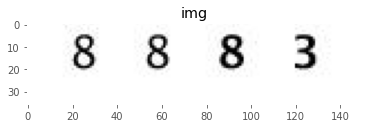

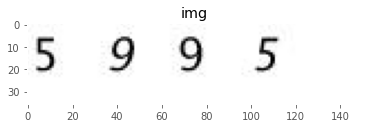

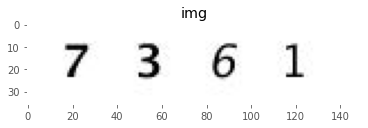

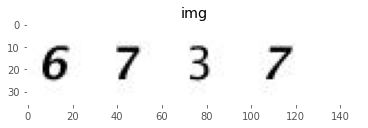

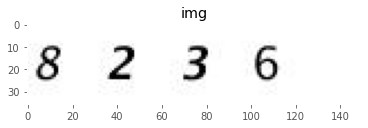

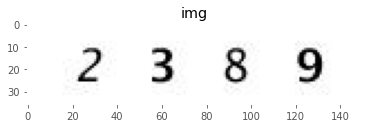

In [30]:
for imagePath in imagePaths:
  image = cv2.imread(imagePath)
  plt_imshow("img", image)

	# load the image and convert it to grayscale, then pad the image
	# to ensure digits caught only the border of the image are
	# retained